In [13]:
import itk
import matplotlib.pyplot as plt
import numpy as np

# Read input image
input_image = itk.imread("Brain_CT.jpg", itk.F)

# Print input image size, spacing, origin, and direction
print("Input image size: ", input_image.GetLargestPossibleRegion().GetSize())
print("Input image spacing: ", input_image.GetSpacing())
print("Input image origin: ", input_image.GetOrigin())
print("Input image direction: ", input_image.GetDirection())


# Create the resample filter
resample_filter = itk.ResampleImageFilter.New(Input=input_image)

# Set the transform to identity by default
identity_transform = itk.IdentityTransform[itk.D, 2].New()
resample_filter.SetTransform(identity_transform)

# Set the interpolator to nearest neighbor
interpolator = itk.NearestNeighborInterpolateImageFunction.New(input_image)
resample_filter.SetInterpolator(interpolator)

# Set output parameters using GetSpacing, GetOrigin, and GetDirection
resample_filter.SetOutputSpacing(input_image.GetSpacing())
resample_filter.SetOutputOrigin(input_image.GetOrigin())
resample_filter.SetOutputDirection(input_image.GetDirection())

# Set the desired size
output_size = [1000, 1000]
resample_filter.SetSize(output_size)

#print output image size, spacing, origin, and direction
print("")
print("Output image size: ", resample_filter.GetSize())
print("Output image spacing: ", resample_filter.GetOutputSpacing())
print("Output image origin: ", resample_filter.GetOutputOrigin())
print("Output image direction: ", resample_filter.GetOutputDirection())

y_ax = max(input_image.GetLargestPossibleRegion().GetSize()[1], output_size[1], 1000) + 1
x_ax = max(input_image.GetLargestPossibleRegion().GetSize()[0], output_size[0], 1000) + 1




Input image size:  itkSize2 ([630, 630])
Input image spacing:  itkVectorD2 ([0.352778, 0.352778])
Input image origin:  itkPointD2 ([0, 0])
Input image direction:  itkMatrixD22 ([[1.0, 0.0], [0.0, 1.0]])

Output image size:  itkSize2 ([1000, 1000])
Output image spacing:  itkVectorD2 ([0.352778, 0.352778])
Output image origin:  itkPointD2 ([0, 0])
Output image direction:  itkMatrixD22 ([[1.0, 0.0], [0.0, 1.0]])


In [14]:

'''
resample_filter.SetDefaultPixelValue(255)

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()


# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "Origin_input.png")
'''

'\nresample_filter.SetDefaultPixelValue(255)\n\n# Execute resampling with identity transform\nresample_filter.Update()\noutput_image = resample_filter.GetOutput()\n\n\n# Cast the image to unsigned char before saving\noutput_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)\noutput_image_cast.Update()\nitk.imwrite(output_image_cast.GetOutput(), "Origin_input.png")\n'

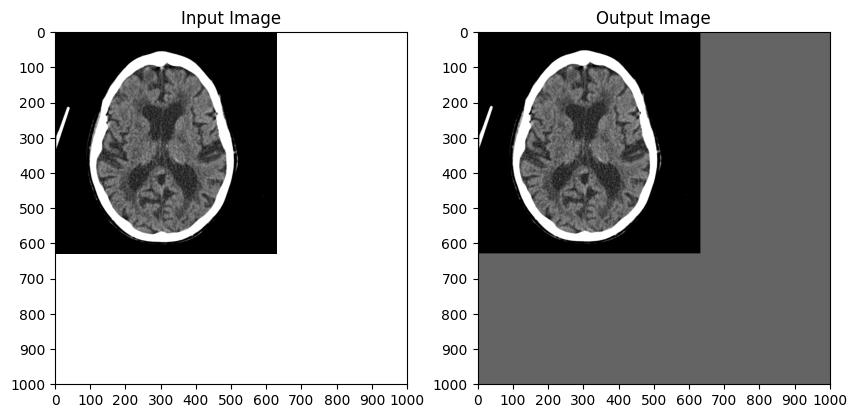

In [15]:

translation = [0.0, 0.0]
translation_transform = itk.TranslationTransform[itk.D, 2].New()
translation_transform.Translate(translation)
resample_filter.SetTransform(translation_transform)

resample_filter.SetDefaultPixelValue(100)

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()


# Show the input and output images in 1000*1000 grid
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Output Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()

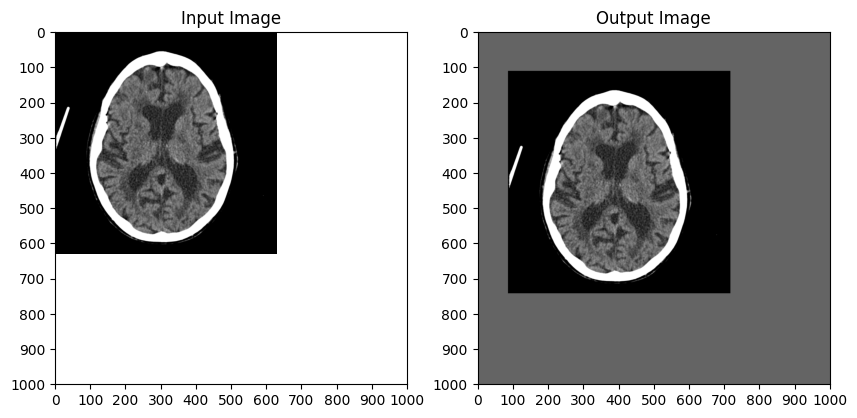

In [16]:

resample_filter.SetOutputOrigin([-30,-40])

# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()

# Cast the image to unsigned char before saving
output_image_cast = itk.CastImageFilter[input_image, itk.Image[itk.UC, 2]].New(Input=output_image)
output_image_cast.Update()
itk.imwrite(output_image_cast.GetOutput(), "Non-zero Origin.png")


# Show the input and output images in 1000*1000 grid
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Output Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()


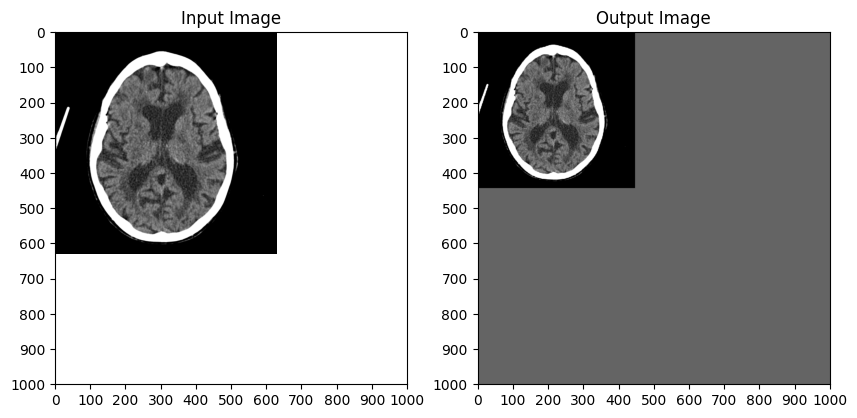

In [17]:
resample_filter.SetOutputSpacing([0.5,0.5])
resample_filter.SetOutputOrigin([0, 0])


# Execute resampling with identity transform
resample_filter.Update()
output_image = resample_filter.GetOutput()



# Show the input and output images in 1000*1000 grid
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(itk.array_from_image(input_image), cmap='gray')
plt.title('Input Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(itk.array_from_image(output_image), cmap='gray')
plt.title('Output Image')
plt.xticks(np.arange(0, x_ax, 100))
plt.yticks(np.arange(0, y_ax, 100))
plt.axis('on')

plt.show()

In [18]:
#Print pixel count of input image in each dimension
print("Input image pixel count in each dimension: ", output_image.GetLargestPossibleRegion().GetSize())


# Explain what happens when reducing the output spacing
# When reducing the output spacing, the output image size increases because the pixel count in each dimension increases. 
# The output image is more detailed and the pixel size is smaller, which means the image has more pixels in each dimension.

# Explain what happens when increasing the output spacing
# When increasing the output spacing, the output image size decreases because the pixel count in each dimension decreases.
# The output image is less detailed and the pixel size is larger, which means the image has fewer pixels in each dimension.

# Explainig what is the spacing of the output image
# The spacing of the output image is the distance between pixels in each dimension.
# The spacing is defined by the user and can be set to any value.
# The spacing can be set to a value smaller than the input image spacing to increase the pixel count and make the image more detailed.
# The spacing can be set to a value larger than the input image spacing to decrease the pixel count and make the image less detailed.



Input image pixel count in each dimension:  itkSize2 ([1000, 1000])
